In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

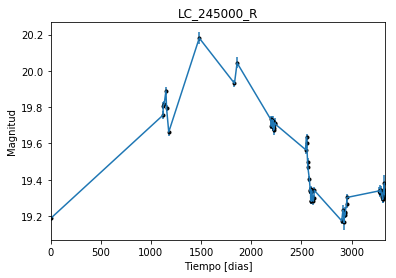

In [2]:
data = np.genfromtxt('LC_245000_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_245000_R')
plt.savefig("LC_245000_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

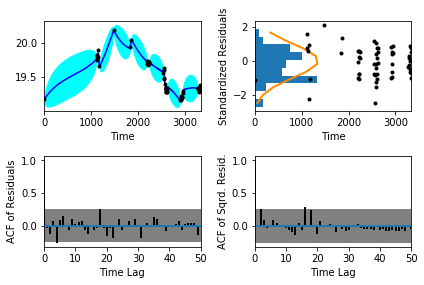

In [5]:
sample.assess_fit()

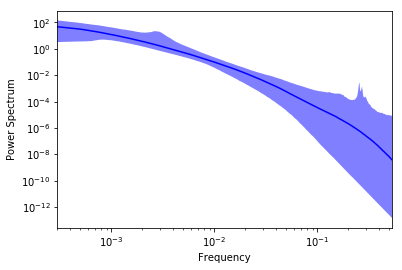

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

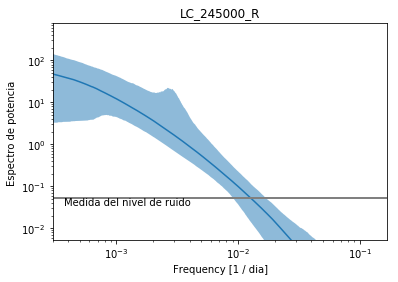

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_245000_R')
plt.savefig("Medida del nivel de ruido_R.pdf")


Text(0.5,1,'Prediccion , valor esperado LC_245000_R')

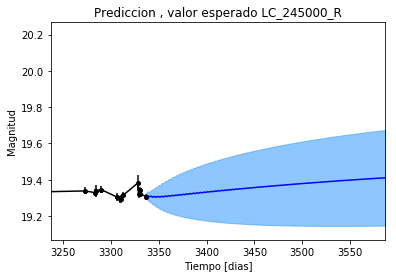

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_245000_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_245000_R')

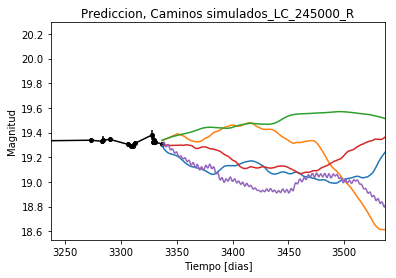

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_245000_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


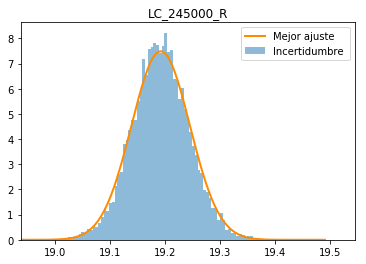

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_245000_R')
plt.savefig("Mejor_ajuste_LC_245000_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_245000_R')

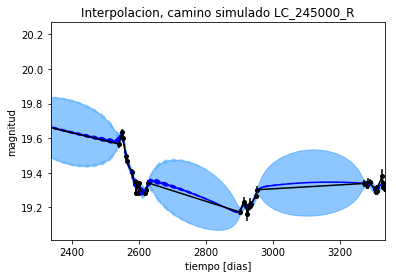

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_R')

Text(0.5,1,'Interpolacion, camino simulado LC_245000_R')

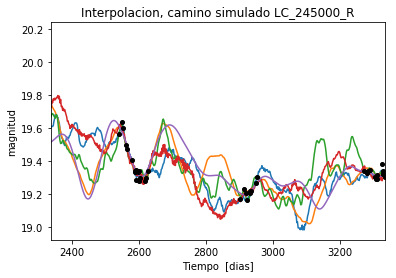

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 266.283265728
Median: 0.0161341087473
Standard deviation: 0.219195871832
68% credibility interval: [ 0.00127403  0.26589085]
95% credibility interval: [  3.61001070e-04   8.66219529e-01]
99% credibility interval: [  3.06150604e-04   1.02553541e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 402.028722019
Median: 0.00531470106919
Standard deviation: 0.113625712606
68% credibility interval: [ 0.00055753  0.05489813]
95% credibility interval: [  3.27176032e-04   3.99384664e-01]
99% credibility interval: [  3.04554625e-04   8.06942290e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 850.324536603
Median: 0.0237626646805


In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 351.027420038
Median: 117.326510706
Standard deviation: 2.29980482614
68% credibility interval: [ 114.97467546  119.07909938]
95% credibility interval: [ 112.09460988  121.76236423]
99% credibility interval: [ 109.8655188   122.93922257]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 221.694326697
Median: 0.611927403512
Standard deviation: 2.4537093423
68% credibility interval: [ 0.12179903  4.12084378]
95% credibility interval: [ 0.04320474  8.51012695]
99% credibility interval: [  0.02049659  11.48547393]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 541.954846174
Median: 2.56438059782
Standard deviation: 11.1290216642
68% credibility interval: [  0.20637281  13.79934792]
95% credibility interval: [  1.51977090e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4444.39000023
Median: 1.36457279153e-29
Standard deviation: 6.02482498174e+125
68% credibility interval: [  1.87227174e-65   2.61072170e-05]
95% credibility interval: [  2.24614528e-83   3.73979010e+77]
99% credibility interval: [  1.13100886e-093   4.36592511e+107]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 710.264431913
Median: 19.5441321872
Standard deviation: 0.156738107297
68% credibility interval: [ 19.3946236   19.68202008]
95% credibility interval: [ 19.20417308  19.83795717]
99% credibility interval: [ 19.06838503  19.96459859]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 762.011428509
Median: 0.14243734426
Standard deviation: 0.269292997832
68% credibility interval: [ 0.          0.49738268]
95% credibility interval: [ 0.          0.95264177]
99% credibility interval: [ 0.          1.04605915]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 762.011428509
Median: 0.14243734426
Standard deviation: 0.269292997832
68% credibility interval: [ 0.          0.49738268]
95% credibility interval: [ 0.          0.95264177]
99% credibility interval: [ 0.          1.04605915]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 437.937904979
Median: 0.0
Standard deviation: 0.000487260694699
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 351.027420038
Median: 117.326510706
Standard deviation: 2.29980482614
68% credibility interval: [ 114.97467546  119.07909938]
95% credibility interval: [ 112.09460988  121.76236423]
99% credibility interval: [ 109.8655188   122.93922257]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1555.26545564
Median: 0.102248343798
Standard deviation: 0.0670299121938
68% credibility interval: [ 0.0689269   0.16474762]
95% credibility interval: [ 0.04724497  0.28253917]
99% credibility interval: [ 0.03927666  0.42353569]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 465.756299964
Median: 1.13074656135
Standard deviation: 0.227002928756
68% credibility interval: [ 0.92133436  1.36841046]
95% credibility interval: [ 0.75884295  1.63866615]
99% credibility interval: [ 0.70299111  1.8116583 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 264.271335482
Median: 0.00556983551163
Standard deviation: 0.289822201184
68% credibility interval: [ 0.00024091  0.04153929]
95% credibility interval: [  4.99054849e-81   3.03512457e-01]
99% credibility interval: [  5.17914738e-111   1.12345195e+000]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 266.283265728
Median: (-0.101373595026-0.100186637913j)
Standard deviation: 2.18168216946
68% credibility interval: [-1.67064151+0.j         -0.00800495-1.59528646j]
95% credibility interval: [ -5.44261782e+00 -2.46679269e+00j  -2.26823662e-03 -1.72972407e-03j]
99% credibility interval: [ -6.44362903e+00+0.j          -1.92360098e-03-0.00273082j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 402.028722019
Median: (-0.03339325167+1.17192483181j)
Standard deviation: 1.83647006932
68% credibility interval: [-0.34493510+3.68261411j -0.00350307+1.59138014j]
95% credibility interval: [ -2.50940785e+00+0.88170062j  -2.05570764e-03+5.91460145j]
99% credibility interval: [ -5.07016794e+00+0.79667868j  -1.91357315e-03+0.0026966